In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wfdb
from keras.saving import load_model
from os import path

%matplotlib inline

2024-10-05 16:39:18.001777: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def get_patients(plist):
    def get_patient(patientid):
        rec = np.load(path.join("numpy", f"SpO2_patient_{patientid}.npy"))
        ann = np.load(path.join("numpy", f"SpO2_annotation_{patientid}.npy"))
        
        return rec, ann
    X, y = get_patient(plist[0])
    siglen = len(y)
    plist = plist[1::]
    for i in plist:
        rec, ann = get_patient(i)
        X = np.hstack((X, rec))
        y = np.hstack((y, ann))
        siglen += len(ann)
    
    X = np.array(np.split(X, siglen, axis=0))
    X = np.array([rec.T for rec in X])
    return X, y

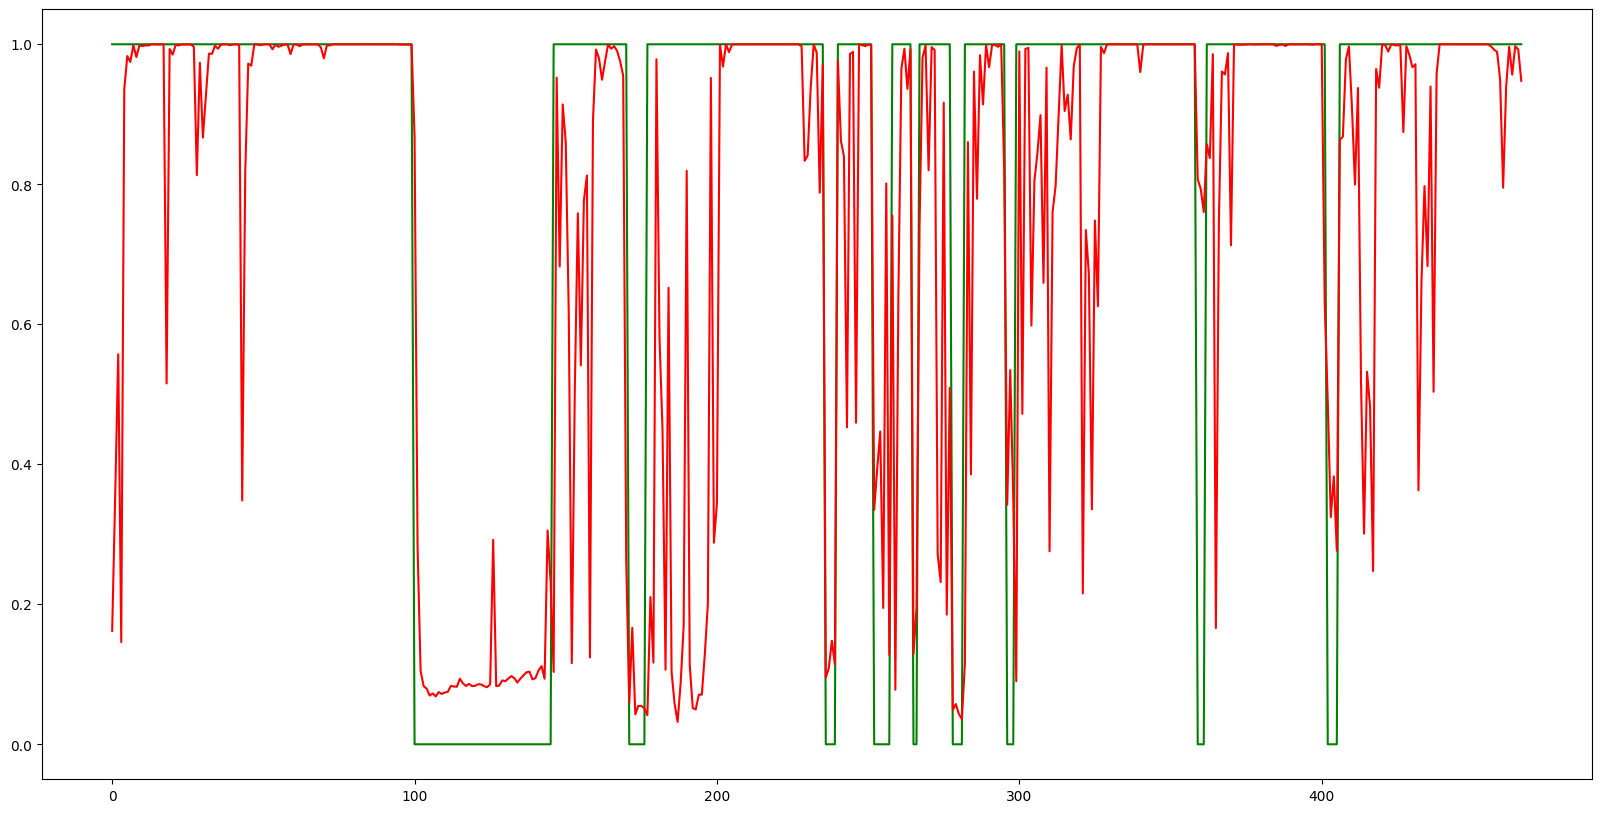

In [6]:
model = load_model(path.join("res", "model_SpO2.keras"))
X, y = get_patients([2])
pred = model.predict(X, verbose=False).flatten()
plt.figure(figsize=(20, 10))
plt.plot(y, color="g")
plt.plot(pred, color="r")
plt.show()